In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import euclidean_distances

sns.set_style('whitegrid')

# Problem definition

Clustering flight cancellation reason based on airline and location

# Load the data

### Cleaned, Merged dataset can be downloaded from here: https://www.kaggle.com/arwasheraky/cleaned-flight-delays-2015

In [2]:
#input
df = pd.read_csv('../../Data/flightsmerged.csv', low_memory=False)
df.head()

,MONTH,FLIGHT_NUMBER,TAIL_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,...,ORIGIN_AC,ORIGIN_NAME,ORIGIN_STATE,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_AC,DESTINATION_NAME,DEST_STATE,DEST_LATITUDE,DEST_LONGITUDE
0,1,98,N407AS,00:05:00,23:54:00,-11.0,205.0,1448,04:30:00,04:08:00,...,ANC,Ted Stevens Anchorage International Airport,AK,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,WA,47.44898,-122.30931
1,1,2336,N3KUAA,00:10:00,00:02:00,-8.0,280.0,2330,07:50:00,07:41:00,...,LAX,Los Angeles International Airport,CA,33.94254,-118.40807,PBI,Palm Beach International Airport,FL,26.68316,-80.09559
2,1,840,N171US,00:20:00,00:18:00,-2.0,286.0,2296,08:06:00,08:11:00,...,SFO,San Francisco International Airport,CA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,NC,35.21401,-80.94313
3,1,258,N3HYAA,00:20:00,00:15:00,-5.0,285.0,2342,08:05:00,07:56:00,...,LAX,Los Angeles International Airport,CA,33.94254,-118.40807,MIA,Miami International Airport,FL,25.79325,-80.29056
4,1,135,N527AS,00:25:00,00:24:00,-1.0,235.0,1448,03:20:00,02:59:00,...,SEA,Seattle-Tacoma International Airport,WA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,AK,61.17432,-149.99619


In [3]:
print(df.columns)

Index(['MONTH', 'FLIGHT_NUMBER', 'TAIL_NUMBER', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_TIME', 'DISTANCE',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DATE', 'CLASS', 'AIRLINE_CODE', 'AIRLINE_NAME',
       'ORIGIN_AC', 'ORIGIN_NAME', 'ORIGIN_STATE', 'ORIGIN_LATITUDE',
       'ORIGIN_LONGITUDE', 'DESTINATION_AC', 'DESTINATION_NAME', 'DEST_STATE',
       'DEST_LATITUDE', 'DEST_LONGITUDE'],
      dtype='object')


# Feature Engineering 

In [4]:
# remove NaNs
df = df.dropna()

### Add average delay column

In [5]:
# Average delay column

df['AVG_DELAY'] = (df['DEPARTURE_DELAY'].abs() + df['ARRIVAL_DELAY'].abs()) / 2.0
df['AVG_DELAY'].head()

0    16.5
1     8.5
2     3.5
3     7.0
4    11.0
Name: AVG_DELAY, dtype: float64

In [6]:
X_columns = ['AVG_DELAY','DISTANCE']

In [7]:
# normalize the columns
df_norm = df.copy()
df_norm = df_norm[X_columns]

for col in X_columns:
    df_norm[col] = df[col].astype(float)
    df_norm[col] = StandardScaler().fit_transform(df_norm[col].values.reshape(-1, 1))

df_norm.head()

,AVG_DELAY,DISTANCE
0,0.164695,1.021612
1,-0.307175,2.469600
2,-0.602093,2.413782
3,-0.395650,2.489301
4,-0.159715,1.021612


# Model Training

Determine number of K values. 
(Example provided below, action could not be completed due to size of data set and processsing time required).


In [8]:
# #Use elbow method to determine number of K values

# SSE = []
# K = range(1,10)
# for k in K:
#     km = KMeans(n_clusters=k)
#     km = km.fit(df_norm)
#     SSE.append(km.inertia_)
    
# # Plot sse against k
# plt.figure(figsize=(6, 6))
# plt.plot(list_k, sse, '-o')
# plt.xlabel(r'Number of clusters *k*')
# plt.ylabel('Sum of squared distance')

In [9]:
k = 3
kmeans = KMeans(n_clusters=k).fit(df_norm.values)

print(set(kmeans.labels_))
print(collections.Counter(kmeans.labels_))

df_results = df.copy()
df_norm['cluster'] = kmeans.labels_
df_results['cluster'] = kmeans.labels_
df_results = df_results.reset_index()

{0, 1, 2}
Counter({0: 3849270, 1: 920612, 2: 349491})


In [10]:
centers = np.array(kmeans.cluster_centers_)

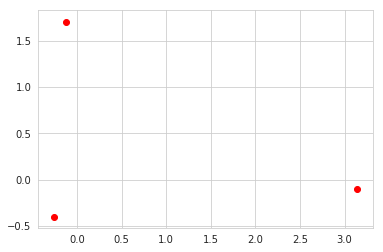

In [11]:
plt.scatter(centers[:,0], centers[:,1], marker="o", color='r')
plt.show()

#### Conclusions:
Data is clustered into 3 groups. 
Based on the initial split that was made:

* Cluster 0 contains 3850563 observations
* Cluster 1 contains 919305 and 
* Cluster 2 contains 349505 observations

# Analyze the results


Cluster 0  : [('ATL', 285345), ('ORD', 204112), ('DFW', 175739), ('DEN', 145308), ('IAH', 103019)]
Cluster 1  : [('LAX', 89114), ('SFO', 59311), ('LAS', 43983), ('PHX', 43943), ('SEA', 42605)]
Cluster 2  : [('ORD', 25953), ('ATL', 20245), ('DFW', 19191), ('DEN', 16141), ('LAX', 12649)]
AVG_DELAY


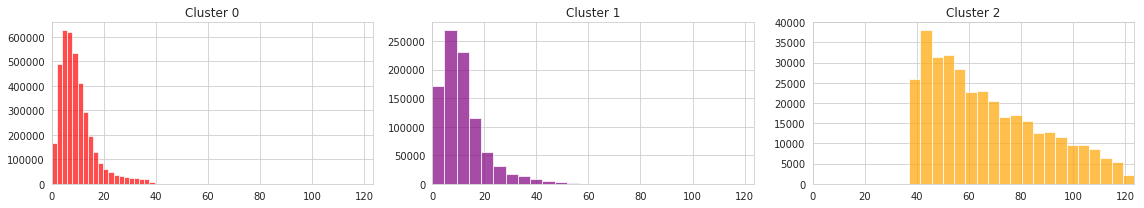

DISTANCE


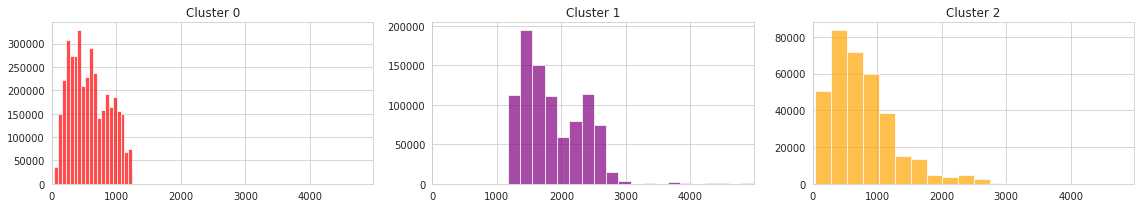

In [12]:

for cluster in sorted(set(kmeans.labels_)):
    print("Cluster",cluster," :",
          collections.Counter(df_results[df_results['cluster']==cluster]['ORIGIN_AC']).most_common(5))
                

n_clusters = len(set(kmeans.labels_))
colors = ['red','purple','orange']


for col in X_columns:
    
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    
    for cluster in sorted(set(kmeans.labels_)):
        plt.subplot(1, n_clusters, i)
        plt.xlim([0,df_results[col].max()])
        plt.hist(df_results[df_results['cluster']==cluster][col], bins=20, label=str(cluster), alpha=0.7, color=colors[i-1])
        plt.title("Cluster "+str(cluster))
        i += 1
    plt.tight_layout()
    plt.show()

Conclusions:
*  Cluster 0 has the highest delay average with ATL being the airport with the highest average.
* Cluster 0 also has the most travelled distance.

In [17]:
# Analyze the centroids
df_results.groupby('cluster').mean().round(2).T

cluster,0,1,2
index,2702292.92,2755921.02,2596887.30
MONTH,6.23,6.34,6.01
FLIGHT_NUMBER,2376.82,1257.13,2267.41
DEPARTURE_DELAY,0.65,3.14,67.29
SCHEDULED_TIME,112.42,268.54,135.05
DISTANCE,581.75,1868.89,764.90
ARRIVAL_DELAY,-3.88,-5.16,66.57
DIVERTED,0.00,0.00,0.00
CANCELLED,0.00,0.00,0.00
AIR_SYSTEM_DELAY,1.18,1.63,11.85


#### Conclusions:
* On average Cluster 2 has the highest number of airline,late aircraft,air system, and average delay times. 
* On average Cluster 1 has the highest distance travelled.

AVG_DELAY


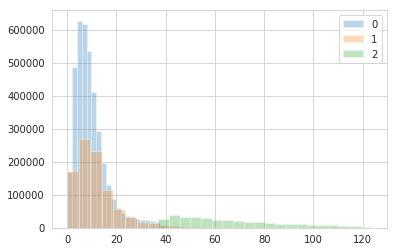

DISTANCE


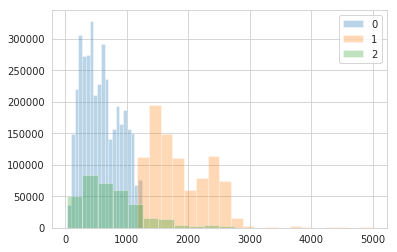

In [14]:
# Analyze the results
for col in X_columns:
    print(col)
    for cluster in set(kmeans.labels_):
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
    plt.legend()
    plt.show()

# Model Evaluation

In [15]:
# Inter-Cluster
centroids = []
for cluster in sorted(set(kmeans.labels_)):
    centroids.append(df_norm[df_norm['cluster']==cluster][X_columns].mean().values)
distances = []
for c1 in centroids:
    for c2 in centroids:
        distances.append(euclidean_distances(c1.reshape(-1, 1), c2.reshape(-1, 1))[0][0])
print('Inter Cluster distance', np.mean(distances))

# Intra-Cluster
distances = []
for cluster in sorted(set(kmeans.labels_)):
    df_filter = df_norm[df_norm['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(-1, 1), v.values.reshape(-1, 1))[0][0])
print('Intra Cluster distance', np.mean(distances))

# Inertia
distances = []
for cluster in sorted(set(kmeans.labels_)):
    df_filter = df_norm[df_norm['cluster']==cluster]
    centroid = df_filter[X_columns].mean().values
    for k, v in df_filter[X_columns].iterrows():
        distances.append(euclidean_distances(centroid.reshape(1, -1), v.values.reshape(1, -1), squared=True)[0][0])
print('Inertia', np.sum(distances))

Inter Cluster distance 1.5092849285561816
Intra Cluster distance 0.35758201359186004
Inertia 3204118.307522436


Conclusion:
* Inter Cluster distance is larger thans Intra Cluster distance representing a good clustering distribution of the data

In [16]:
# Data takes to long to process Samples code below:
# inertia = []
# number_k = []
# for k in range(2, 100, 10):
#     kmeans = KMeans(n_clusters=k).fit(df_norm.values)
#     inertia.append(kmeans.inertia_)
#     number_k.append(k)
# plt.plot(number_k, inertia)
# plt.show()